<a href="https://colab.research.google.com/github/Mariam-Shaik/FruitsRecognition/blob/master/Fruits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dir_path = "/content/drive/My Drive/fruits"

In [ ]:
#Importing Library
import numpy as np
import pandas as pd
import cv2
import os 
from PIL import Image

In [ ]:
#Checking the directory
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/fruits/apple_81.jpg
/content/drive/My Drive/fruits/apple_89.jpg
/content/drive/My Drive/fruits/apple_77.jpg
/content/drive/My Drive/fruits/apple_83.jpg
/content/drive/My Drive/fruits/apple_86.jpg
/content/drive/My Drive/fruits/apple_90.jpg
/content/drive/My Drive/fruits/apple_87.jpg
/content/drive/My Drive/fruits/apple_80.jpg
/content/drive/My Drive/fruits/apple_88.jpg
/content/drive/My Drive/fruits/apple_84.jpg
/content/drive/My Drive/fruits/apple_91.jpg
/content/drive/My Drive/fruits/apple_93.jpg
/content/drive/My Drive/fruits/apple_78.jpg
/content/drive/My Drive/fruits/apple_95.jpg
/content/drive/My Drive/fruits/apple_92.jpg
/content/drive/My Drive/fruits/apple_85.jpg
/content/drive/My Drive/fruits/apple_82.jpg
/content/drive/My Drive/fruits/apple_94.jpg
/content/drive/My Drive/fruits/apple_79.jpg
/content/drive/My Drive/fruits/orange_80.jpg
/content/drive/My Drive/fruits/orange_90.jpg
/content/drive/My Drive/fruits/orange_95.jpg
/content/drive/My Drive/fruit

In [ ]:
images  =  []       
labels  =  [] 
train_path  =  '/content/drive/My Drive/fruits'
for filename in os.listdir('/content/drive/My Drive/fruits'):
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        labels.append(filename.split('_')[0])
        images.append(np.array(img_arr))

In [ ]:
#Image Labels
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_encod  =  LabelEncoder()
labels = pd.DataFrame(labels)
labels = lb_encod.fit_transform(labels[0])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2])

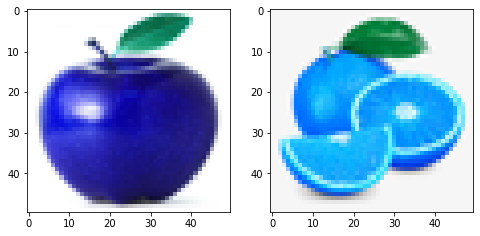

In [ ]:
#Visualizing image
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
ax = figure.add_subplot(121)
ax.imshow(images[0])
bx = figure.add_subplot(122)
bx.imshow(images[30])
plt.show()

In [ ]:
#Saving the image array and corresponding labels
images = np.array(images)
np.save("image",images)
np.save("labels",labels)

#Loading the images and labels that we have saved above
image = np.load("image.npy",allow_pickle = True)
labels = np.load("labels.npy",allow_pickle = True)

img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

In [ ]:
num_classes = len(np.unique(labels))
len_data = len(image)

In [ ]:
x_train, x_test = image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]
y_train, y_test = labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

import keras
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


l2_reg = 0.001
opt = Adam(lr = 0.001)

#Defining the CNN Model
cnn_model  =  Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (50,50, 3), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(16, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

#CNN Model Summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)        

In [ ]:
#Compiling the model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
#Training the CNN Model
filepath = 'weights.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
history = cnn_model.fit(x_train, y_train, batch_size = 128, epochs = 110, verbose = 1, validation_split = 0.33)


Train on 36 samples, validate on 18 samples
Epoch 1/110
36/36 [==============================] - 1s 17ms/step - loss: 7.2317 - accuracy: 0.3056 - val_loss: 21.7773 - val_accuracy: 0.1667
Epoch 2/110
36/36 [==============================] - 0s 3ms/step - loss: 20.4657 - accuracy: 0.3333 - val_loss: 6.3693 - val_accuracy: 0.3889
Epoch 3/110
36/36 [==============================] - 0s 3ms/step - loss: 11.4108 - accuracy: 0.3056 - val_loss: 3.7384 - val_accuracy: 0.3889
Epoch 4/110
36/36 [==============================] - 0s 3ms/step - loss: 5.2650 - accuracy: 0.2222 - val_loss: 16.5215 - val_accuracy: 0.1667
Epoch 5/110
36/36 [==============================] - 0s 3ms/step - loss: 14.9138 - accuracy: 0.3333 - val_loss: 10.8147 - val_accuracy: 0.1667
Epoch 6/110
36/36 [==============================] - 0s 3ms/step - loss: 8.8088 - accuracy: 0.3333 - val_loss: 4.5007 - val_accuracy: 0.4444
Epoch 7/110
36/36 [==============================] - 0s 3ms/step - loss: 4.2305 - accuracy: 0.3889 - va

In [ ]:
#Check the performance
scores  =  cnn_model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


6/6 [==============================] - 0s 1ms/step
Test loss: 0.39775151014328003
Test accuracy: 1.0


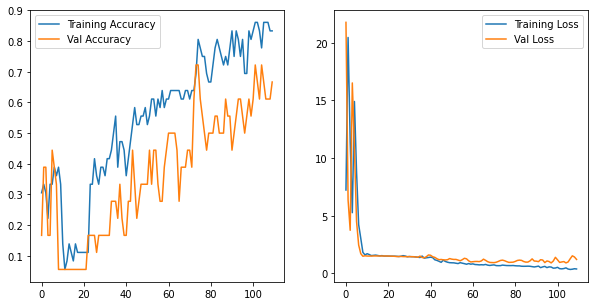

In [ ]:
#Visualize the performance
figure = plt.figure(figsize = (10,5))
ax = figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx = figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

apple


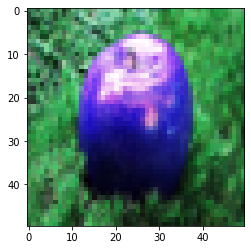

In [ ]:
#Test
test_path  =  '/content/drive/My Drive/fruits'
t_labels = []
t_images = []
for filename in os.listdir('/content/drive/My Drive/fruits'):
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(test_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(img_arr))

test_images = np.array(t_images)
np.save("test_image",test_images)
test_image = np.load("image.npy",allow_pickle = True)

pred = np.argmax(cnn_model.predict(test_image),axis = 1)
prediction =  lb_encod.inverse_transform(pred)

test_image = np.expand_dims(test_image[25],axis = 0)
pred_test = np.argmax(cnn_model.predict(test_image),axis = 1)
prediction_test  =  lb_encod.inverse_transform(pred_test)

print(prediction_test[0])
plt.imshow(test_images[10])